In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, confusion_matrix, classification_report
from IPython.display import display_html
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, KFold,GridSearchCV, StratifiedKFold, RepeatedStratifiedKFold, TunedThresholdClassifierCV, cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from IPython.display import display
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from collections import OrderedDict
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, make_scorer
from IPython.display import display

In [2]:
import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import display
import graphviz


### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv'
y_train = 'train_Y.csv'# содержит только имя файла, без имен папок !!!

In [5]:
df0 = pd.read_csv(path_train)
df1 = pd.read_csv(y_train)
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

In [6]:
# df = df.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_binary  47363 non-null  float64
dtypes: float64(1)
memory usage: 370.2 KB


In [7]:
df = pd.concat([df0, df1], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

In [8]:
df = df.drop_duplicates()
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0,1.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47358,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0,1.0
47359,0.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0,0.0
47360,1.0,0.0,1.0,28.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,5.0,20.0,0.0,0.0,9.0,4.0,6.0,1.0
47361,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,5.0,6.0,8.0,0.0


In [9]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.00000,...,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000,46578.000000
mean,0.569496,0.527717,0.975396,29.934604,0.480205,0.063893,0.150908,0.697153,0.606102,0.78550,...,0.095732,2.854588,3.795247,5.885289,0.256602,0.457147,8.601979,4.908304,5.668749,0.505968
std,0.495152,0.499237,0.154916,7.168650,0.499613,0.244565,0.357963,0.459494,0.488618,0.41048,...,0.294226,1.108264,8.199532,10.100270,0.436762,0.498166,2.853608,1.027933,2.174496,0.499970
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,1.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.00000,...,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


<Axes: >

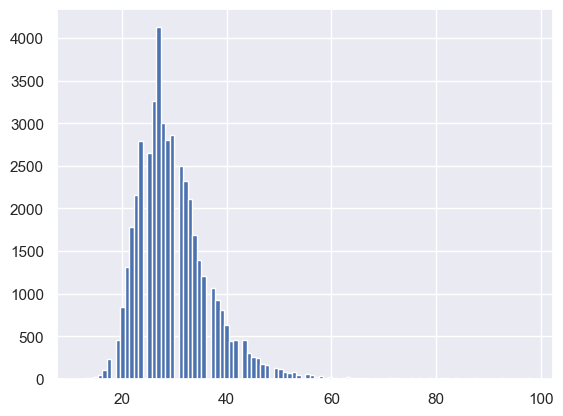

In [10]:
df['BMI'].hist(bins=100)

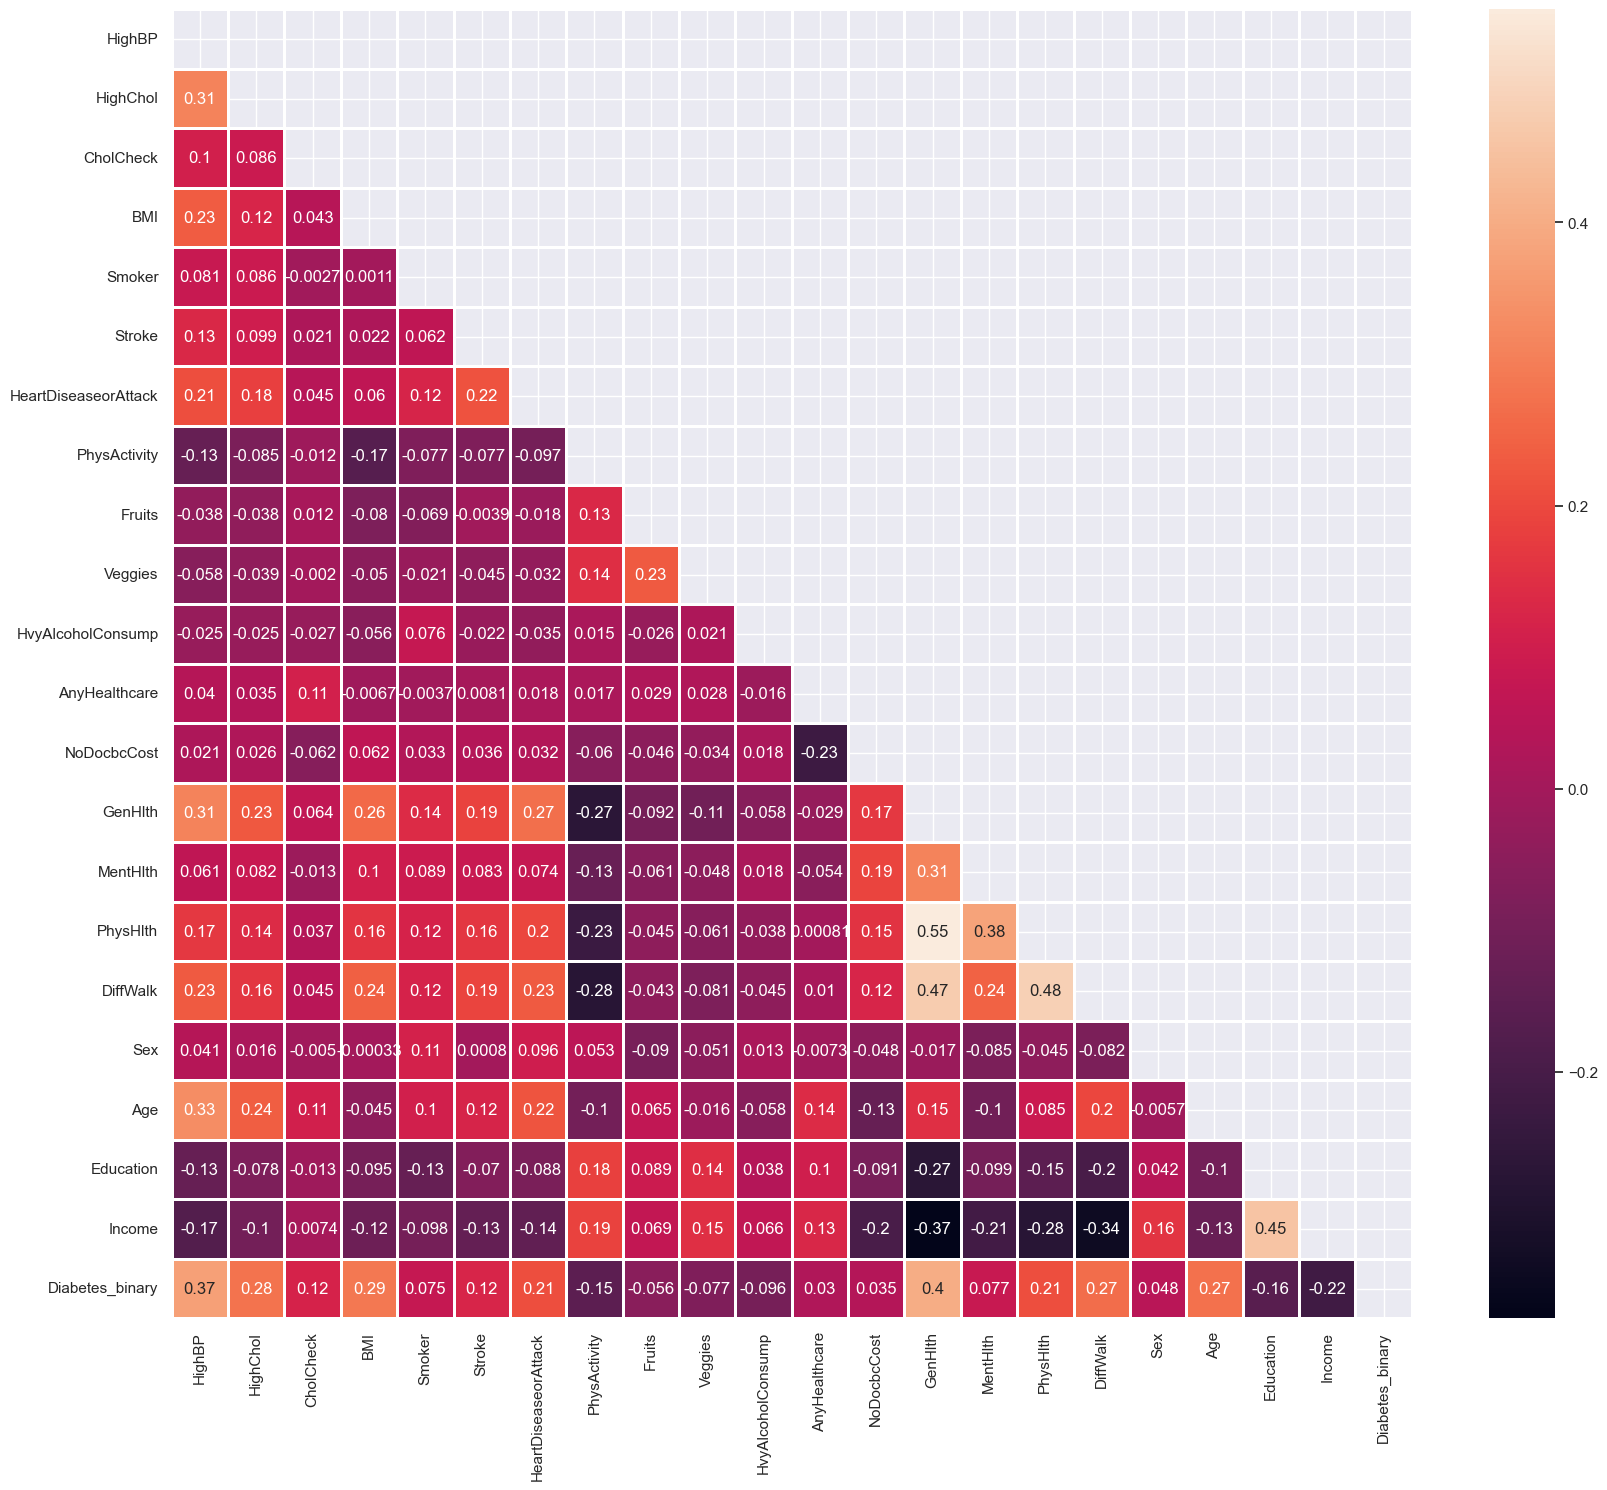

In [11]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");


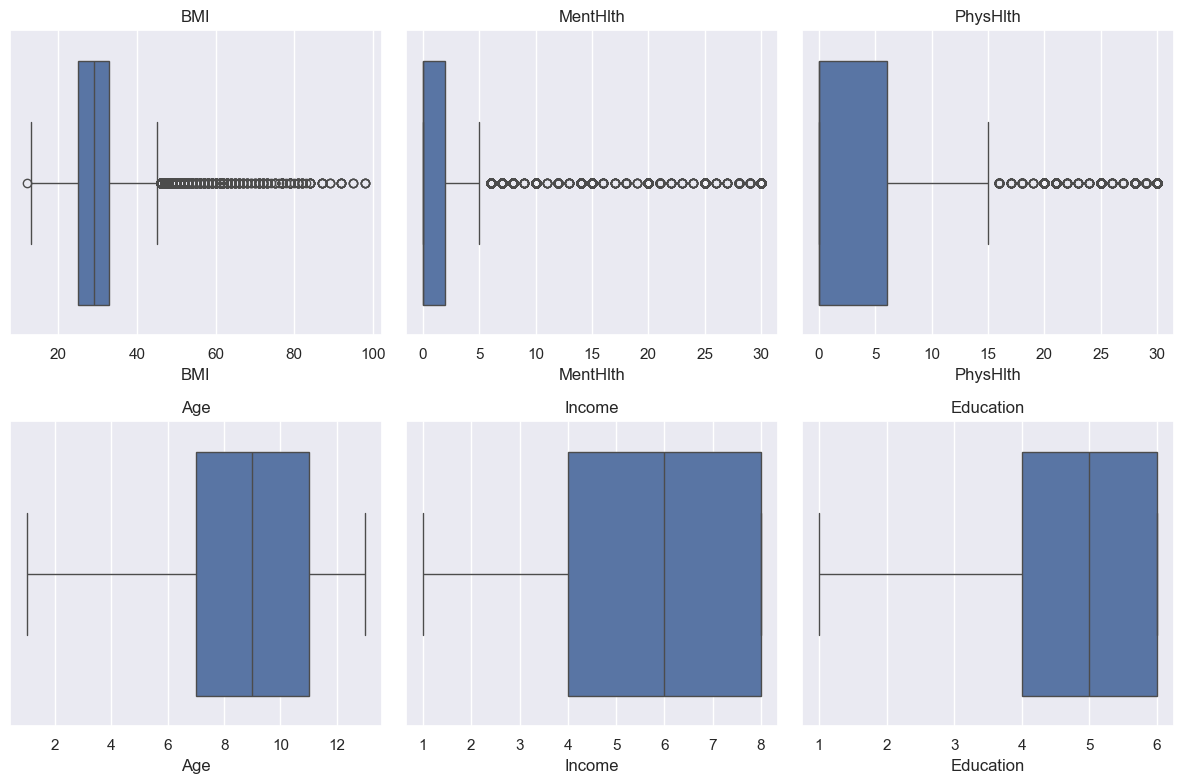

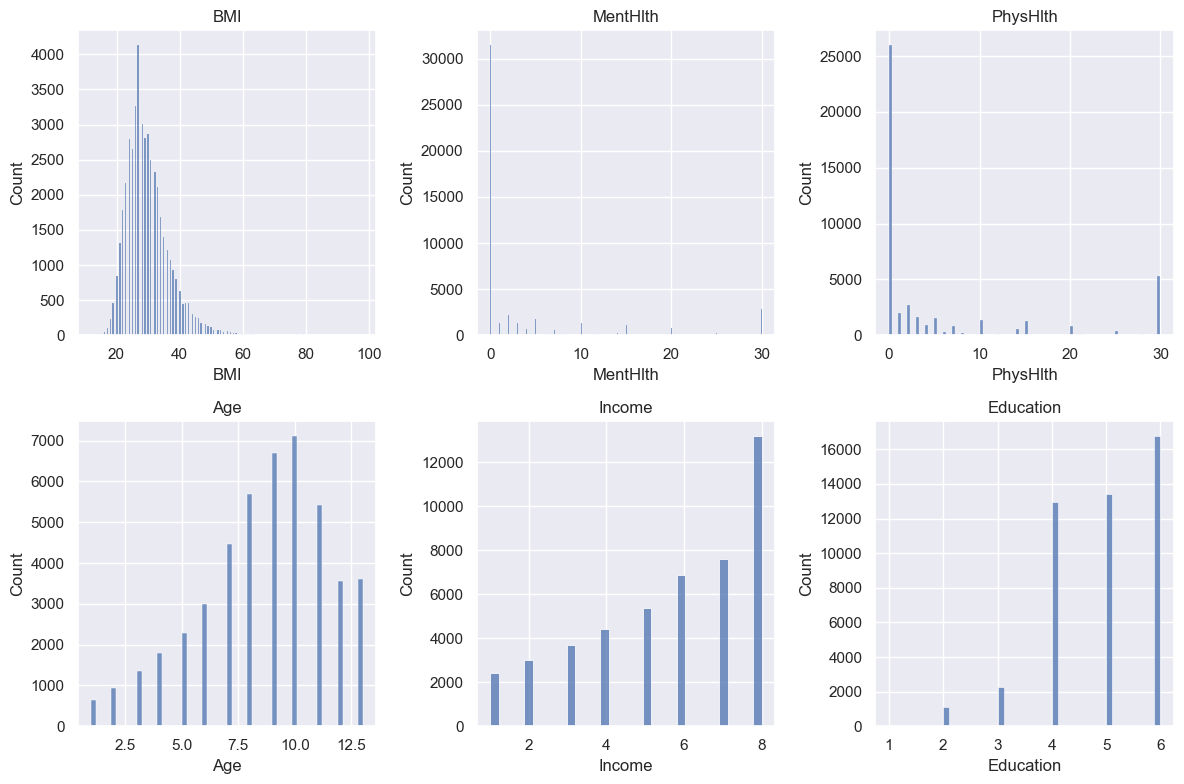

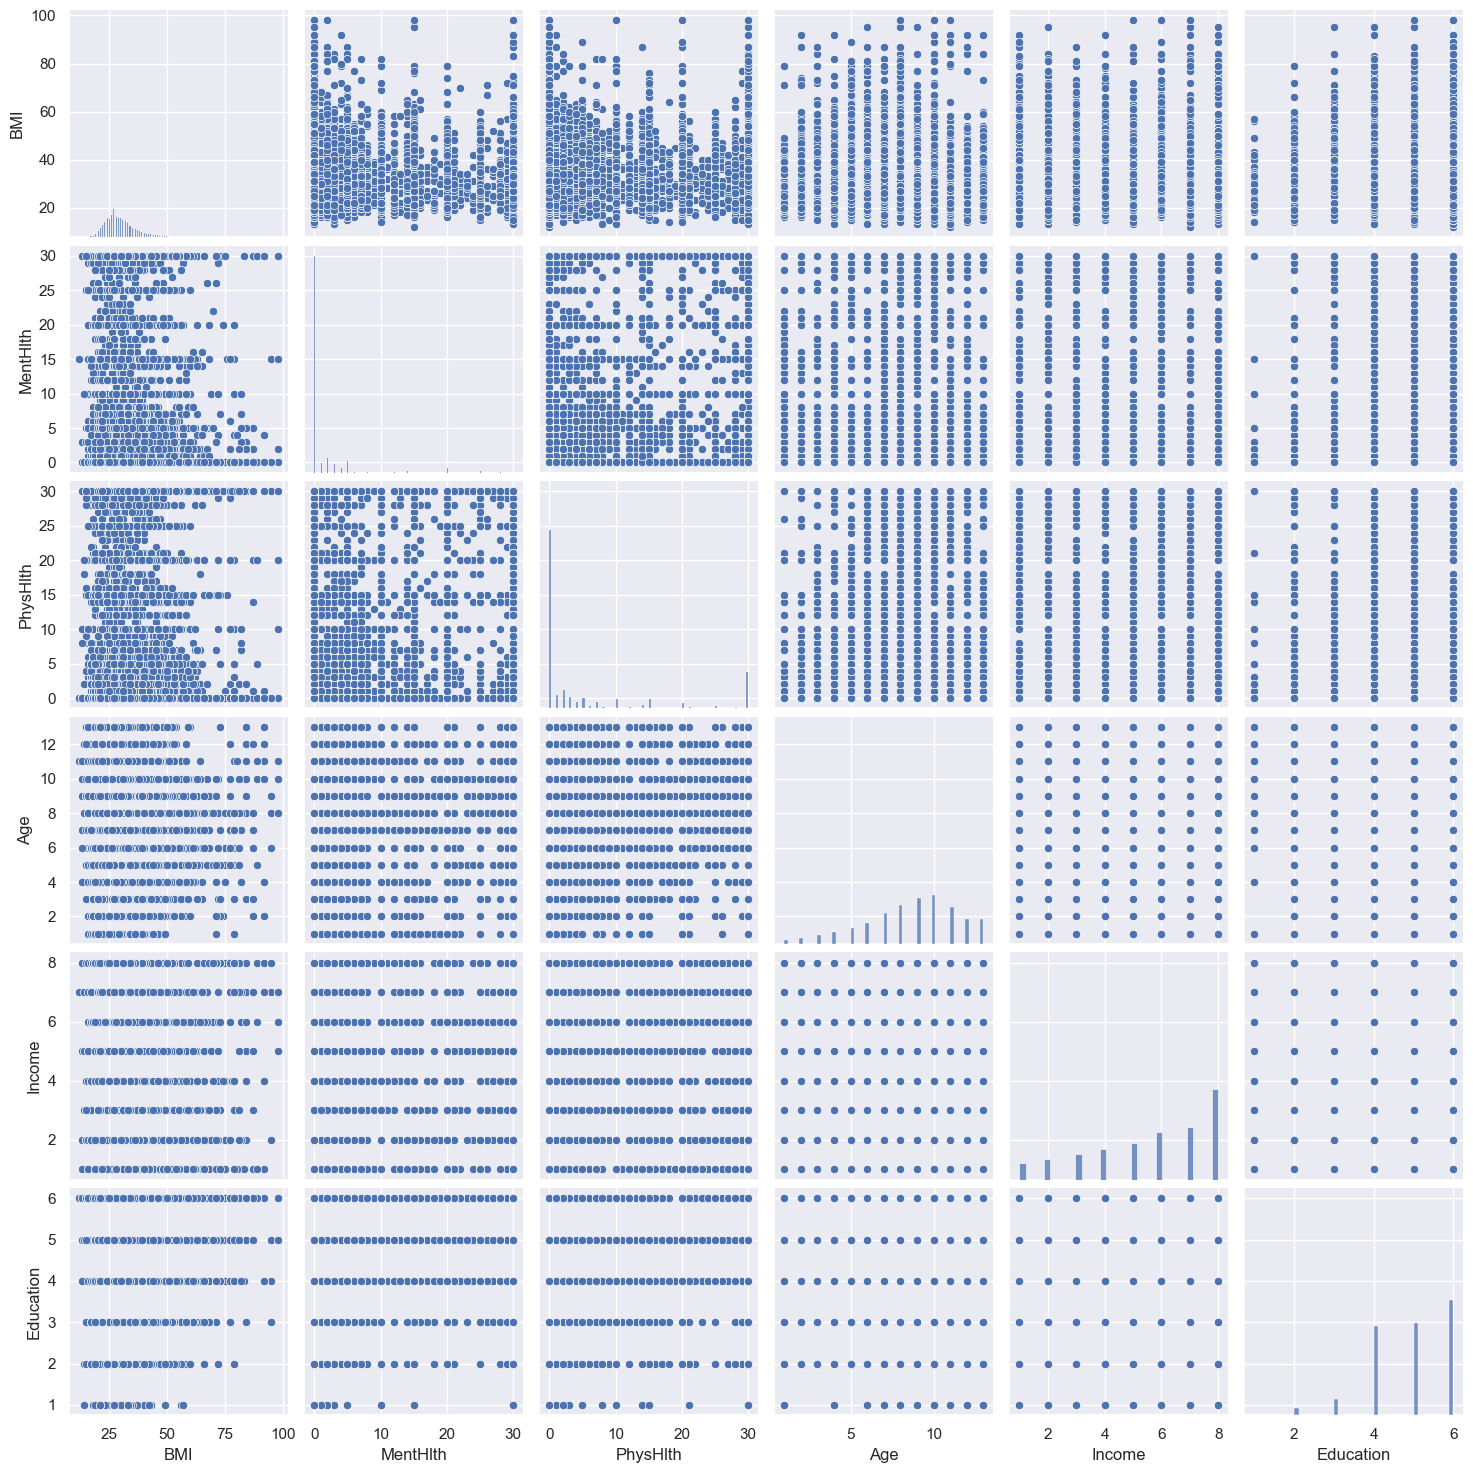

In [12]:
feat = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth','MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_binary']

numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Income', 'Education']

# Диаграммы размаха (boxplots)
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)  # Измененная компоновка подграфиков
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# Гистограммы
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)  # Измененная компоновка подграфиков
    sns.histplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


# Диаграммы рассеяния (scatter plots) (pairplot может быть медленным для большого количества признаков)
#Для больших наборов данных рассмотрите возможность выбора подмножества признаков для pairplot или использования других методов визуализации
sns.pairplot(df[numeric_features])
plt.show()

In [13]:
df.replace(['NA', '', '?'], np.nan, inplace=True)

missing_counts = df.isnull().sum()
print(missing_counts)

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64


In [14]:
y = np.array(df.Diabetes_binary)
X = df.drop(columns=['Diabetes_binary'])

X_train,X_test,y_train,y_test = train_test_split(X, y) 

In [15]:
numeric_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'GenHlth', 'Education', 'Income']
#category = ['GenHlth', 'Education', 'Income']
num = Pipeline(steps=[
    ('missing_num', KNNImputer()),
#    ('bin', KBinsDiscretizer(n_bins = 3, strategy = 'uniform', encode = 'onehot-dense')),
    ('scaler', MinMaxScaler())]) #StandardScaler()RobustScaler
# cat_transformer = Pipeline(steps=[
#     ('missing_num', SimpleImputer(strategy='most_frequent')),
#     ('ce', ce.OrdinalEncoder()),
#     ('scaler', MinMaxScaler())
#     ])  
CT = ColumnTransformer([
    ("num", num, numeric_features)
#    ("categ", cat_transformer, category)
    ], force_int_remainder_cols=False, remainder='passthrough').set_output(transform='pandas')
display(CT)


ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head().T

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('missing_num', KNNImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth', 'Age',
                                  'GenHlth', 'Education', 'Income'])])

,8560,12742,34098,9095,42609
num__BMI,0.152941,0.317647,0.341176,0.164706,0.176471
num__MentHlth,0.033333,0.000000,0.000000,0.000000,0.066667
num__PhysHlth,0.033333,0.000000,0.000000,0.000000,0.033333
num__Age,0.416667,0.583333,0.916667,0.916667,0.833333
num__GenHlth,0.250000,0.750000,0.250000,0.000000,0.250000
num__Education,0.800000,0.800000,1.000000,0.400000,1.000000
num__Income,0.714286,0.571429,1.000000,0.714286,0.857143
remainder__HighBP,1.000000,1.000000,1.000000,0.000000,1.000000
remainder__HighChol,1.000000,1.000000,1.000000,0.000000,1.000000
remainder__CholCheck,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#ct['num__GenHlth'].describe()

In [17]:

pos_label, neg_label = 1, 0  # 1 обозначает диабет, 0 — отсутствие диабета

def fpr_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    tn, fp, _, _ = cm.ravel()
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0 #Обработка деления на ноль
    return 1 - tnr

tpr_score = recall_score  # TPR и recall — это одна и та же метрика

scoring = {
    "precision": make_scorer(precision_score, pos_label=pos_label),
    "recall": make_scorer(recall_score, pos_label=pos_label),
    "fpr": make_scorer(fpr_score, neg_label=neg_label, pos_label=pos_label),
    "tpr": make_scorer(tpr_score, pos_label=pos_label),
}


def diabetes_gain_score(y, y_pred, neg_label, pos_label):
    """Пользовательская функция оценки, сильнее штрафующая пропущенные диагнозы диабета."""
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    # Штраф за ложноотрицательные результаты (пропущенный диабет) в два раза больше, чем за ложноположительные
    gain_matrix = np.array(
        [
            [0, -1],  # -1 балл за ложноположительные результаты (предсказание диабета, когда его нет)
            [-2, 0],  # -2 балла за ложноотрицательные результаты (пропуск диабета)
        ]
    )
    return np.sum(cm * gain_matrix)


scoring["diabetes_gain"] = make_scorer(
    diabetes_gain_score, neg_label=neg_label, pos_label=pos_label
)

print(scoring)


{'precision': make_scorer(precision_score, response_method='predict', pos_label=1), 'recall': make_scorer(recall_score, response_method='predict', pos_label=1), 'fpr': make_scorer(fpr_score, response_method='predict', neg_label=0, pos_label=1), 'tpr': make_scorer(recall_score, response_method='predict', pos_label=1), 'diabetes_gain': make_scorer(diabetes_gain_score, response_method='predict', neg_label=0, pos_label=1)}


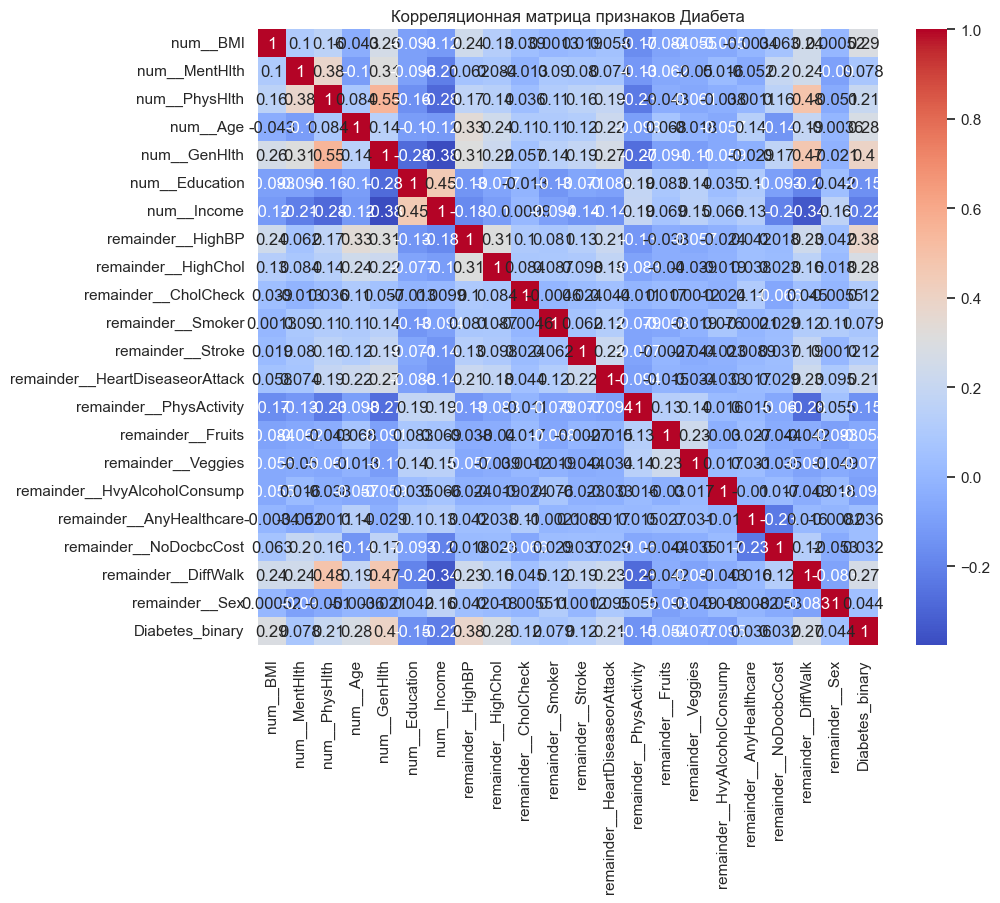

Корреляции с Диабетом:
num__BMI                           0.291184
num__MentHlth                      0.077581
num__PhysHlth                      0.206270
num__Age                           0.275292
num__GenHlth                       0.396959
num__Education                    -0.154808
num__Income                       -0.216242
remainder__HighBP                  0.378676
remainder__HighChol                0.279991
remainder__CholCheck               0.115037
remainder__Smoker                  0.079043
remainder__Stroke                  0.117588
remainder__HeartDiseaseorAttack    0.209630
remainder__PhysActivity           -0.149690
remainder__Fruits                 -0.054491
remainder__Veggies                -0.077164
remainder__HvyAlcoholConsump      -0.095144
remainder__AnyHealthcare           0.035656
remainder__NoDocbcCost             0.032285
remainder__DiffWalk                0.266186
remainder__Sex                     0.043643
Diabetes_binary                    1.000000
Name: Dia

In [18]:
corrt = ct
corrt['Diabetes_binary'] = df['Diabetes_binary']
correlation_matrix = ct.corr()

# Визуализируйте корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица признаков Диабета")
plt.show()

# Выведите корреляции с ценой
print("Корреляции с Диабетом:")
print(correlation_matrix["Diabetes_binary"])

In [19]:

pipe = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=2))
])
pipe.fit(X_train)
X_pca = pipe.transform(X_train)


In [20]:
pca = pipe.named_steps['pca']
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 21)


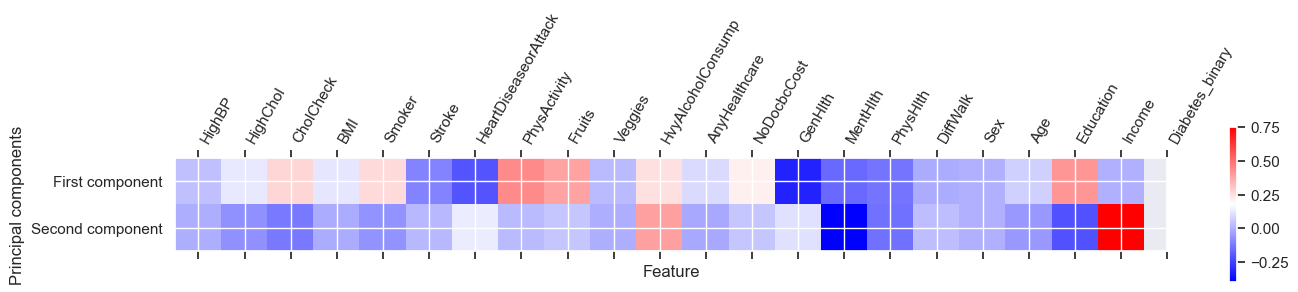

In [21]:
plt.matshow(pca.components_, cmap='bwr')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(feat)),
         feat, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

<BarContainer object of 2 artists>

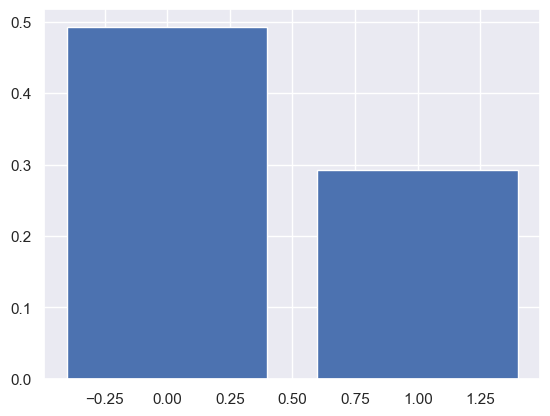

In [22]:
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_)

PCA(n_components=2)

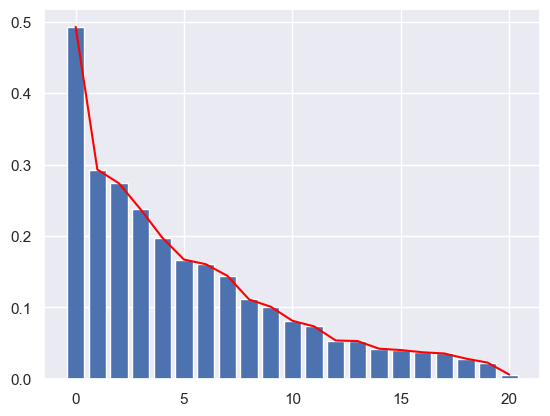

In [23]:
pipe1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA())
])
pipe1.fit(X_train)
########################
pca = pipe1.named_steps['pca'] 
########################
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_);
plt.plot(pca_features,pca.explained_variance_, c ='red');

display(pipe.named_steps['pca'])

In [24]:
print("Всего дисперсия   ", sum(pca.explained_variance_))
print("0.9 дисперсии   ", 0.9 * sum(pca.explained_variance_))
k=10
print("k-компонент объясняют дисперсию   ",sum(pca.explained_variance_[:k]))

Всего дисперсия    2.651209207064009
0.9 дисперсии    2.3860882863576083
k-компонент объясняют дисперсию    2.1780262618078154


PCA(n_components=0.9)

Дисперсия всего 2.386292957063551
Компонент всего 13


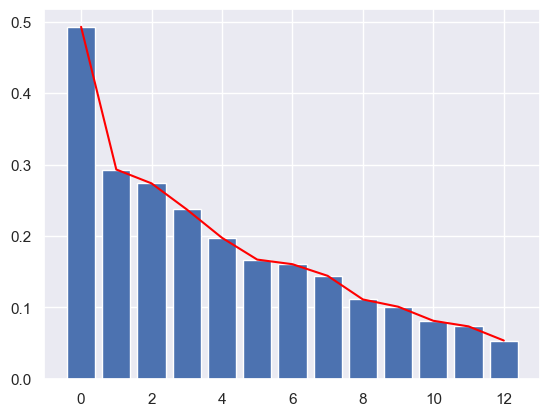

In [25]:
pipe = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9))
])
pipe.fit(X_train)
########################
pca = pipe.named_steps['pca'] 
########################
pca_features=range(pca.n_components_)
plt.bar(pca_features,pca.explained_variance_);
plt.plot(pca_features,pca.explained_variance_, c ='red');

display(pipe.named_steps['pca'])
print("Дисперсия всего", sum(pca.explained_variance_))
print("Компонент всего", pca.n_components_)

In [26]:

# sc_train1 =[]
# sc_test1 = []
# sc_train2 =[]
# sc_test2 = []
# n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 1000, 5000]
# for n in n_estimators:
#     rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1)
#     rf.fit(X_train, y_train)
#     sc_train_n = rf.score(X_train, y_train)
#     sc_test_n = rf.score(X_test, y_test)
#     sc_train1.append(sc_train_n)
#     sc_test1.append(sc_test_n)

# for n in n_estimators:
#     rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1, criterion= 'entropy')
#     rf.fit(X_train, y_train)
#     sc_train_n = rf.score(X_train, y_train)
#     sc_test_n = rf.score(X_test, y_test)
#     sc_train2.append(sc_train_n)
#     sc_test2.append(sc_test_n)    
    
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# ax1.plot(n_estimators,sc_train1)
# ax1.plot(n_estimators,sc_test1)
# ax1.set_ylim(0.9, 1.01)
# ax2.plot(n_estimators,sc_train2)
# ax2.plot(n_estimators,sc_test2)
# ax2.set_ylim(0.9, 1.01);

In [182]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='sqrt', min_samples_leaf = 5, random_state=0, oob_score = True))
])
forest.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('missing_num',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth', 'Age', 'GenHlth',
                                                   'Education', 'Income'])])),
                ('pca', PCA(n_components=0.9)),
                ('estimator',
                 RandomForestClassifier(min_samples_leaf=5, n_estimators=1000,
                                        oob_score=True, random_state=0))])

In [183]:
rf_classifier = forest.named_steps['estimator']

print('Правильность на обучающем наборе: {:.3f}'.format(forest.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(rf_classifier.oob_score_))  # Доступ к oob_score_ из классификатора
print('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 0.897
Правильность на OOB: 0.720
Правильность на тестовом наборе: 0.715


In [184]:
forest1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features=10, random_state=0,
                               oob_score = True))
])
forest1.fit(X_train, y_train)
rf_classifier = forest1.named_steps['estimator']
print('Правильность на обучающем наборе: {:.3f}'.format(forest1.score(X_train, y_train)))
print('Правильность на OOB: {:.3f}'.format(rf_classifier.oob_score_))  # Доступ к oob_score_ из классификатора
print('Правильность на тестовом наборе: {:.3f}'.format(forest1.score(X_test, y_test)))

Правильность на обучающем наборе: 0.997
Правильность на OOB: 0.701
Правильность на тестовом наборе: 0.700


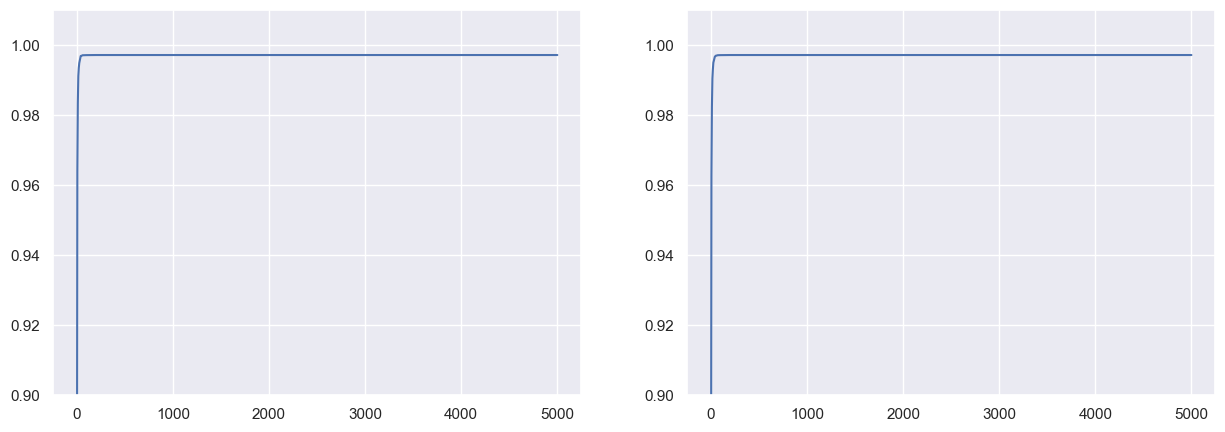

In [27]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 1000, 5000]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)    
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.9, 1.01)
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.9, 1.01);

In [189]:
# def plot_feature_importances_cancer(model):
#     n_features = cancer.data.shape[1]
#     plt.barh(range(n_features), model.feature_importances_, align='center') 
#     plt.yticks(np.arange(n_features), cancer.feature_names) 
#     plt.xlabel("Важность признака")
#     plt.ylabel("Признак")
# plt.figure(figsize = (15, 10))
# plot_feature_importances_cancer(RandomForestClassifier(n_estimators=1000, max_features=10, random_state=0,
#                                oob_score = True).fit(X_train, y_train))

In [ ]:
min_samples_leaf=1

In [227]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='log2', min_samples_leaf = 50, random_state=0, oob_score = True))
])
forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest, X_test, y_test)}")

Метрика: -4448


In [229]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='log2', min_samples_leaf = 24, random_state=0, oob_score = True))
])
forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest, X_test, y_test)}")

Метрика: -4448


In [230]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='log2', min_samples_leaf = 26, random_state=0, oob_score = True))
])
forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest, X_test, y_test)}")

Метрика: -4442


In [231]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='log2',random_state=0, oob_score = True))
])
forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest, X_test, y_test)}")

Метрика: -4454


In [237]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='log2',random_state=0, oob_score = True))
])
# forest.fit(X_train, y_train)
# print(f"Метрика: {scoring['diabetes_gain'](forest, X_test, y_test)}")
min_samples_leaf = [ 7,25, 35, 45, 55, 70, 90, 100]
param_grid = [
  {
    'estimator__min_samples_leaf': min_samples_leaf
 #   'estimator__weights': weights,
 #   'estimator__metric': metric,
  }
]
grid = GridSearchCV(forest, param_grid, n_jobs=-1, scoring='recall' ) 
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('missing_num',
                                                                                          KNNImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['BMI',
                                                                          'MentHlth',
                                                                          'PhysHlth',
                                                                          'Age',
                                                                          'GenHlth',
                                                                          'Education',
                                                                          'Income'])])),
                                       ('pca', PCA(n_components=0.9)),
                                       ('estimator',
                                        RandomForestClassifier(max_features='log2',
                                                               n_estimators=1000,
                                                               oob_score=True,
                                                               random_state=0))]),
             n_jobs=-1,
             param_grid=[{'estimator__min_samples_leaf': [7, 25, 35, 45, 55, 70,
                                                          90, 100]}],
             scoring='recall')

In [238]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result.head(20)

,7,6,5,4,2,1,3,0
mean_fit_time,197.969511,205.863506,215.443364,226.559761,209.669763,221.991815,210.641039,262.141696
std_fit_time,2.125339,1.638805,1.410602,1.48843,1.09533,2.028094,6.083285,3.114878
mean_score_time,1.515887,1.485517,1.620841,1.779178,1.633146,1.759591,1.693221,2.500994
std_score_time,0.158505,0.064093,0.035287,0.136544,0.277443,0.151839,0.224558,0.200412
param_estimator__min_samples_leaf,100,90,70,55,35,25,45,7
params,{'estimator__min_samples_leaf': 100},{'estimator__min_samples_leaf': 90},{'estimator__min_samples_leaf': 70},{'estimator__min_samples_leaf': 55},{'estimator__min_samples_leaf': 35},{'estimator__min_samples_leaf': 25},{'estimator__min_samples_leaf': 45},{'estimator__min_samples_leaf': 7}
split0_test_score,0.789281,0.788717,0.787588,0.788717,0.788717,0.788717,0.788152,0.77969
split1_test_score,0.795205,0.794076,0.793512,0.79323,0.792384,0.789563,0.790127,0.782511
split2_test_score,0.801693,0.798872,0.801128,0.797743,0.796615,0.798872,0.795487,0.787024
split3_test_score,0.796275,0.796275,0.792325,0.791196,0.789221,0.788093,0.788657,0.777088


In [239]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='log2', min_samples_leaf = 100, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")

Метрика: -4454


In [28]:

RANDOM_STATE = 42
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            n_jobs = -1,
            warm_start=True,
            min_samples_leaf = 5,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            n_jobs = -1,
            min_samples_leaf = 5,
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Сопоставляем имя классификатора со списком пар (<n_estimators>, <коэффициент ошибок>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 20
max_estimators = 1200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Запишем ошибку OOB для каждой настройки `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Создаем график «Коэффициент ошибок OOB» и график «n_estimators».
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

C:\Users\user1\Downloads\Anaconda356\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\user1\Downloads\Anaconda356\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


KeyboardInterrupt: 

In [252]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=10, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4499


In [253]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=1, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4474


In [254]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=2, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4460


In [35]:
# best_forest = Pipeline(steps=[
#   ('preproc', CT),
#   ('pca', PCA(n_components=0.9)),
#   ('estimator', RandomForestClassifier(n_estimators=1000, n_jobs = -1, min_samples_leaf = 25, max_features=3, random_state=0, oob_score = True))
# ])
# best_forest.fit(X_train, y_train)
# print(f"Метрика: {scoring['diabetes_gain'](best_forest, X_test, y_test)}")
best_forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, max_features='log2', n_jobs = -1, min_samples_leaf = 25, random_state=0, oob_score = True))
])
best_forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](best_forest, X_test, y_test)}")

Метрика: -4547


In [256]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=4, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4438


In [257]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=5, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4461


In [258]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=6, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4479


In [259]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=7, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4465


In [260]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=8, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4484


In [261]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=9, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4484


In [262]:
forest_1 = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=11, random_state=0, oob_score = True))
])
forest_1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest_1, X_test, y_test)}")


Метрика: -4503


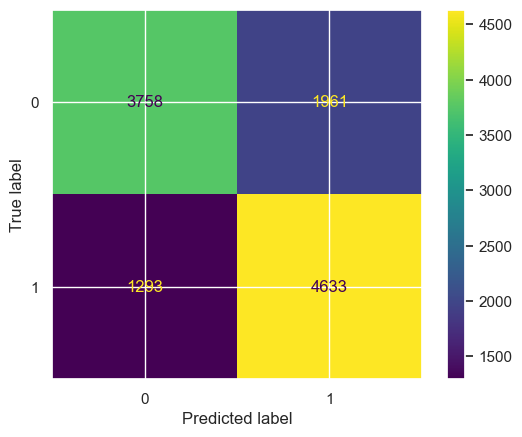

In [36]:

best_forest.fit(X_train, y_train)
y_pred = best_forest.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();

**ЛУЧШИЙ ЛЕС ПОКА ЧТО**

In [31]:
best_forest1 = Pipeline(steps=[
  ('preproc', CT),
 # ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, n_jobs = -1, min_samples_leaf = 25, max_features=3, random_state=0, oob_score = True))
])
best_forest1.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](best_forest1, X_test, y_test)}")


Метрика: -4179


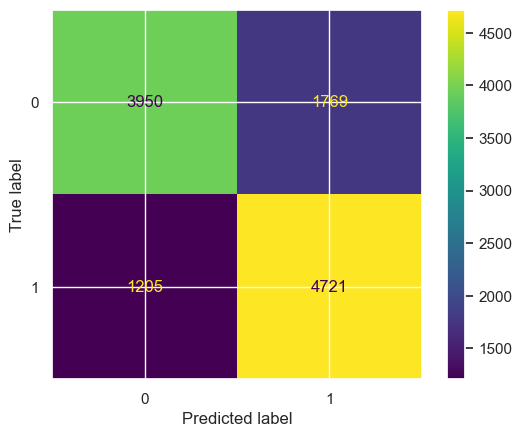

In [32]:

best_forest1.fit(X_train, y_train)
y_pred = best_forest1.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot();

In [275]:
best_forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.85)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=3, random_state=0, oob_score = True))
])
best_forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](best_forest, X_test, y_test)}")


Метрика: -4654


In [280]:

best_forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', IncrementalPCA(n_components=15)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=3, random_state=0, oob_score = True))
])
best_forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](best_forest, X_test, y_test)}")


Метрика: -4463


In [269]:
forest = Pipeline(steps=[
  ('preproc', CT),
  ('pca', PCA(n_components=0.9)),
  ('estimator', RandomForestClassifier(n_estimators=1000, min_samples_leaf = 25, max_features=3, random_state=0, oob_score = True, criterion = 'entropy'))
])
forest.fit(X_train, y_train)
print(f"Метрика: {scoring['diabetes_gain'](forest, X_test, y_test)}")


Метрика: -4450


In [ ]:
def plot_learnig_tree_new(estimator, X_train, X_test, y_train, y_test):  
    
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    n_estimators = estimator.n_estimators_
    zero = np.zeros(n_estimators, dtype=np.float64)
    color_one = 'blue'
    color_two = 'red'
    
    train_score = zero
    for i, y_pred_train in enumerate(estimator.staged_predict(X_train)):
        train_score[i] = accuracy_score(y_train, y_pred_train)
    ax1.plot(
        (np.arange(train_score.shape[0]) + 1),
        train_score,
        "-",
        color=color_one,
        label='Train',
        )
        
    test_score = zero
    for i, y_pred_test in enumerate(estimator.staged_predict(X_test)):
        train_score[i] = accuracy_score(y_test, y_pred_test)    
    ax1.plot(
        (np.arange(test_score.shape[0]) + 1),
        train_score,
        "-",
        color = color_two,
        label='Test',
        )
    ax1.legend(loc='best')


    train_deviance = zero
    for i, y_pred_train in enumerate(estimator.staged_predict_proba(X_train)):
        train_deviance[i] = log_loss(y_train, y_pred_train)
        
    ax2.plot(
        (np.arange(train_deviance.shape[0]) + 1),
        train_deviance,
        '-',
        color=color_one,
        label="score "+str(round(estimator.score(X_train, y_train),3))
    )

    test_deviance = zero
    for i, y_pred_test in enumerate(estimator.staged_predict_proba(X_test)):
        test_deviance[i] = log_loss(y_test, y_pred_test)
        
    ax2.plot(
        (np.arange(test_deviance.shape[0]) + 1),
        test_deviance,
        '-',
        color=color_two,
        label="score "+str(round(estimator.score(X_test, y_test),3))
    )
    ax2.legend(loc='best')    
    
    
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

clf = GradientBoostingClassifier(n_estimators=500,random_state=42)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)

clf = GradientBoostingClassifier(n_estimators=500,random_state=42, learning_rate = 0.01)
clf.fit(X_train, y_train)
#plot_learnig_tree(clf, X_train, X_test, y_train, y_test)
plot_learnig_tree_new(clf, X_train, X_test, y_train, y_test)